# 1. Problem Statement 
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
 The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

# 2. Hypothesis Generation 
We could get some hypotheses that might affect the sales, and they are as following: 
1. Sales might be higher at weekends 
2. Sales might be higher on occasions (e.g., Ramadan Month, Feasts, Festivals and so on...)
3. The offers, discounts and packages the store offers makes sales higher 
4. The location of the store and the population in this location 
5. Ads and posters  
6. studying people needs and priorities 
7. maintaining the relationship with the customers 
8. Store Size 
9. Products that the store offers, the more products, the higher the sales 
10. offering children's products 
11. Store age

# 3. Loading Packages and Data 

In [196]:
# import modules
import pandas as pd 
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

from sklearn.model_selection import train_test_split 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

C:\Users\LapStore\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# 4. Data Structure and Content

In [139]:
# Read the data 
train_data_file_path = '../data/Train.csv'
test_data_file_path  = '../data/Test.csv'

train_data = pd.read_csv(train_data_file_path)
test_data  = pd.read_csv(test_data_file_path)

print("Training data shape: ", train_data.shape)
print("Test data shape: ",     test_data.shape)

Training data shape:  (8523, 12)
Test data shape:  (5681, 11)


In [140]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [141]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# 5. Exploratory Data Analysis 

In [142]:
# check if there is any missing target values 
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Then, there is no missing target values and the missing values are in just 2 columns: 
`Item_Weight` and `Outlet_Size`

In [143]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Same as the training set

In [144]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [145]:
train_data.nunique()


Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [146]:
# check if there is any invalid values in the data 
cols = train_data.columns 
for col in cols: 
    unique_vals = train_data[col].unique()
    print("Unique values in {}: {}".format(col, unique_vals))

Unique values in Item_Identifier: ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Unique values in Item_Weight: [ 9.3    5.92  17.5   19.2    8.93  10.395 13.65     nan 16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8
 13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895
  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855
  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305
 20.85  20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1   10.5
  6.635 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65  20.25
  8.6   12.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8   16.6
 14.    16.    21.25   7.365 18.35   5.465  7.27   6.155 19.5   15.2
 14.5   13.1   12.3   11.1   11.3    5.75  11.35   6.525 10.3    5.78
 11.85  18.75   5.26  16.1    9.5   13.8   14.65   6.67   6.11  17.2
  6.32   4.88   5.425 14.1    7.55  17.25  12. 

We notice that Item_Fat_Content column has repeated values with different naming:
Unique values in Item_Fat_Content: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

In [147]:
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].str.strip()

lf_matches = ['Low Fat', 'low fat', 'LF']
lf_rows = train_data['Item_Fat_Content'].isin(lf_matches)
train_data.loc[lf_rows, "Item_Fat_Content"] = 'lf' 

reg_matches = ['Regular']
reg_rows = train_data['Item_Fat_Content'].isin(reg_matches)
train_data.loc[reg_rows, "Item_Fat_Content"] = 'reg'

train_data['Item_Fat_Content'].unique()

array(['lf', 'reg'], dtype=object)

In [148]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,lf,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,reg,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,lf,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,reg,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,lf,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [149]:
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].str.strip()

lf_rows = test_data['Item_Fat_Content'].isin(lf_matches)
test_data.loc[lf_rows, "Item_Fat_Content"] = 'lf' 

reg_rows = test_data['Item_Fat_Content'].isin(reg_matches)
test_data.loc[reg_rows, "Item_Fat_Content"] = 'reg'

test_data['Item_Fat_Content'].unique()

array(['lf', 'reg'], dtype=object)

In [150]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

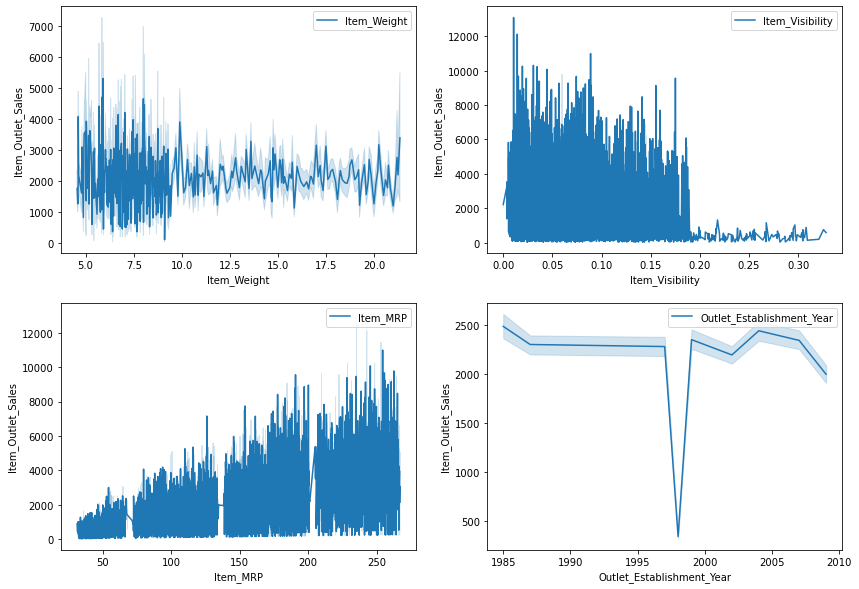

In [13]:
f, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.lineplot(data=train_data, x="Item_Weight", y="Item_Outlet_Sales", label="Item_Weight", ax=axs[0][0])
sns.lineplot(data=train_data, x="Item_Visibility", y="Item_Outlet_Sales", label="Item_Visibility", ax=axs[0][1])
sns.lineplot(data=train_data, x="Item_MRP", y="Item_Outlet_Sales", label="Item_MRP", ax=axs[1][0])
sns.lineplot(data=train_data, x="Outlet_Establishment_Year", y="Item_Outlet_Sales", label="Outlet_Establishment_Year", ax=axs[1][1])


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

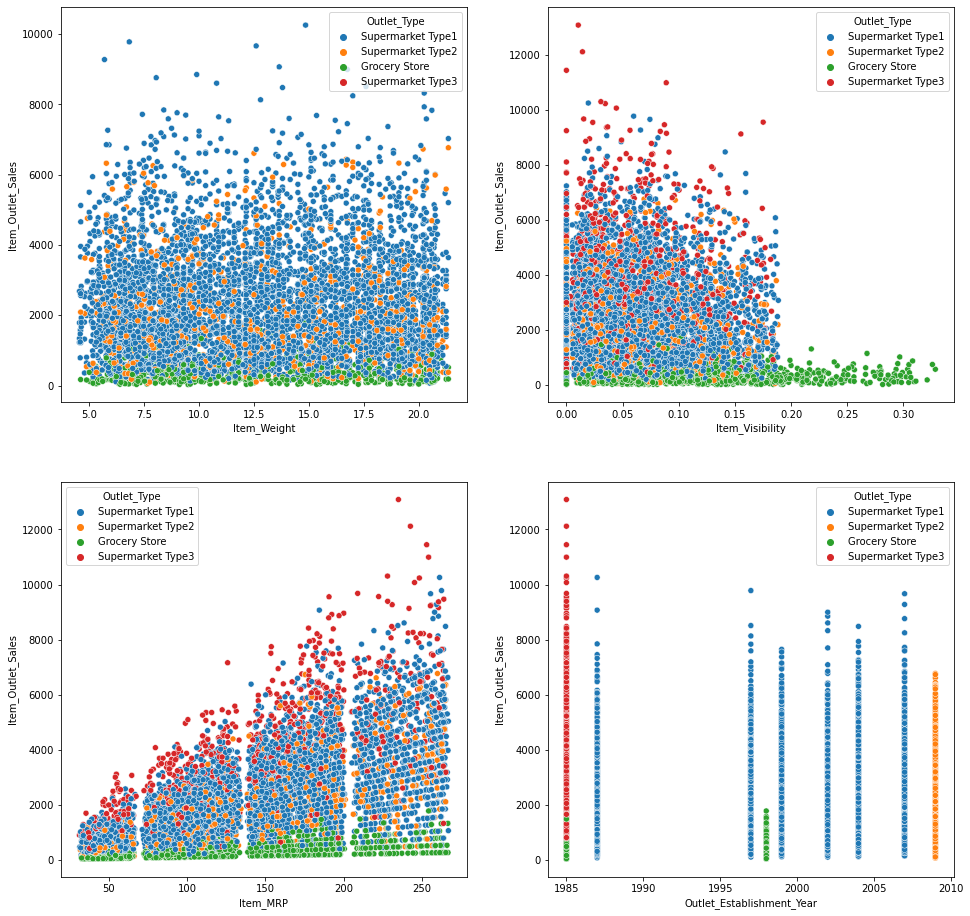

In [14]:
f, axs = plt.subplots(2, 2, figsize=(16, 16))

sns.scatterplot(data=train_data, x="Item_Weight", y="Item_Outlet_Sales", ax=axs[0][0], hue="Outlet_Type")

sns.scatterplot(data=train_data, x="Item_Visibility", y="Item_Outlet_Sales", ax=axs[0][1], hue="Outlet_Type")

sns.scatterplot(data=train_data, x="Item_MRP", y="Item_Outlet_Sales", ax=axs[1][0], hue="Outlet_Type")

sns.scatterplot(data=train_data, x="Outlet_Establishment_Year", y="Item_Outlet_Sales", ax=axs[1][1], hue="Outlet_Type")


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

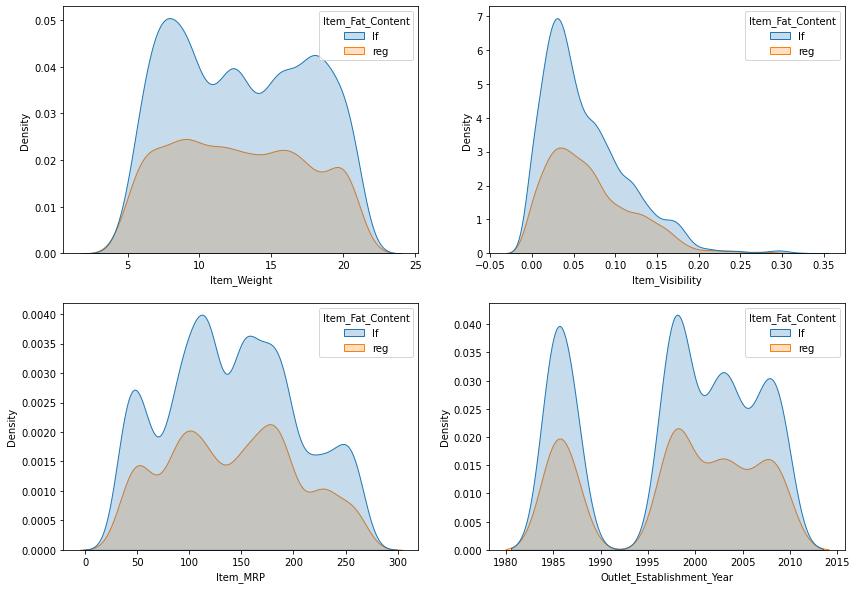

In [15]:
f, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.kdeplot(data=train_data, x="Item_Weight", ax=axs[0][0], shade=True, hue="Item_Fat_Content")
sns.kdeplot(data=train_data, x="Item_Visibility", ax=axs[0][1], shade=True, hue="Item_Fat_Content")
sns.kdeplot(data=train_data, x="Item_MRP", ax=axs[1][0], shade=True, hue="Item_Fat_Content")
sns.kdeplot(data=train_data, x="Outlet_Establishment_Year", ax=axs[1][1], shade=True, hue="Item_Fat_Content")


We will perform scaling and normalization later after handling missing values 

In [151]:
# separate target values from the training data 
y = train_data['Item_Outlet_Sales']

# drop target values from training data 
train_data.drop(['Item_Outlet_Sales'], axis=1, inplace=True)

# Break validation set from training data 
X_train, X_valid, y_train, y_valid = train_test_split(train_data, y, 
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=0)

categorical_cols = [col for col in X_train.columns if
                   X_train[col].dtype == 'object']

# select high cardinality categorical columns 
low_card_categorical_cols = [col for col in X_train.columns if
                   X_train[col].dtype == 'object' and 
                   X_train[col].nunique() < 10]

high_card_categorical_cols = list(set(categorical_cols) - set(low_card_categorical_cols))

# select numerical columns 
numerical_cols = [col for col in X_train.columns if
                 X_train[col].dtype in ['int64', 'float64']]

In [152]:
print(X_train.shape)
X_train.head()

(6818, 11)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
6404,FDA56,NaN,lf,0.008722,Fruits and Vegetables,123.5414,OUT027,1985,Medium,Tier 3,Supermarket Type3
5820,DRH25,18.70,lf,0.014623,Soft Drinks,52.0324,OUT045,2002,NaN,Tier 2,Supermarket Type1
48,FDL12,15.85,reg,0.121633,Baking Goods,60.6220,OUT046,1997,Small,Tier 1,Supermarket Type1
4583,FDB05,NaN,lf,0.145670,Frozen Foods,247.2776,OUT019,1985,Small,Tier 1,Grocery Store
3791,FDH10,21.00,lf,0.049296,Snack Foods,194.4478,OUT035,2004,Small,Tier 2,Supermarket Type1


In [153]:
print(y_train.shape)
y_train.head()

(6818,)


6404    4508.1318
5820    1090.5804
48      2576.6460
4583     743.0328
3791     968.7390
Name: Item_Outlet_Sales, dtype: float64

In [154]:
print(X_valid.shape)
X_valid.head()

(1705, 11)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4931,NCS53,14.500,lf,0.089960,Health and Hygiene,159.5604,OUT045,2002,NaN,Tier 2,Supermarket Type1
4148,FDF58,NaN,lf,0.009535,Snack Foods,64.5510,OUT027,1985,Medium,Tier 3,Supermarket Type3
7423,NCM29,11.500,lf,0.017742,Health and Hygiene,129.6626,OUT017,2007,NaN,Tier 2,Supermarket Type1
4836,FDM40,10.195,lf,0.000000,Frozen Foods,143.1154,OUT017,2007,NaN,Tier 2,Supermarket Type1
944,FDH10,21.000,lf,0.049264,Snack Foods,195.0478,OUT013,1987,High,Tier 3,Supermarket Type1


In [155]:
print(y_valid.shape)
y_valid.head()

(1705,)


4931    1426.1436
4148    1201.7690
7423    1836.2764
4836    2410.8618
944     1549.9824
Name: Item_Outlet_Sales, dtype: float64

# 6. Handling missing values 

In [156]:
(X_train[categorical_cols].nunique()).sort_values()

Item_Fat_Content           2
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
Outlet_Identifier         10
Item_Type                 16
Item_Identifier         1556
dtype: int64

In [157]:
print("Categorical columns: \n", categorical_cols)
print("-" * 100)
print("High cardinality categorical columns: \n", high_card_categorical_cols)
print("-" * 100)
print("Low cardinalty categorical columns: \n", low_card_categorical_cols)
print("-" * 100)
print("Numerical Columns: \n", numerical_cols)

Categorical columns: 
 ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
----------------------------------------------------------------------------------------------------
High cardinality categorical columns: 
 ['Outlet_Identifier', 'Item_Type', 'Item_Identifier']
----------------------------------------------------------------------------------------------------
Low cardinalty categorical columns: 
 ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
----------------------------------------------------------------------------------------------------
Numerical Columns: 
 ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']


In [158]:
def do_imputation(df_train, df_valid, df_test, cols, strategy):
    imputer = SimpleImputer(strategy=strategy)
    imputed_train = pd.DataFrame(imputer.fit_transform(df_train[cols]))
    imputed_valid = pd.DataFrame(imputer.transform(df_valid[cols]))
    imputed_test  = pd.DataFrame(imputer.transform(df_test[cols]))
    
    imputed_train.columns = cols
    imputed_valid.columns = cols
    imputed_test.columns  = cols 
    
    return imputed_train, imputed_valid, imputed_test


In [159]:
X_train_c = X_train.copy()
X_valid_c = X_valid.copy()
imputed_train_num_vals, imputed_valid_num_vals, imputed_test_num_vals = do_imputation(X_train_c, X_valid_c, test_data,
                                                                                      numerical_cols, 'median')
 
imputed_train_cat_vals, imputed_valid_cat_vals, imputed_test_cat_vals = do_imputation(X_train_c, X_valid_c, test_data,
                                                                                      categorical_cols, 'most_frequent')

X_train_c = pd.concat([imputed_train_num_vals, imputed_train_cat_vals], axis=1)
X_valid_c = pd.concat([imputed_valid_num_vals, imputed_valid_cat_vals], axis=1)
X_test_c = pd.concat([imputed_test_num_vals, imputed_test_cat_vals], axis=1)

In [160]:
X_train_c.isnull().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Identifier              0
Item_Fat_Content             0
Item_Type                    0
Outlet_Identifier            0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [161]:
X_valid_c.isnull().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Identifier              0
Item_Fat_Content             0
Item_Type                    0
Outlet_Identifier            0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [162]:
X_test_c.isnull().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Identifier              0
Item_Fat_Content             0
Item_Type                    0
Outlet_Identifier            0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [163]:
print(X_train_c.shape)
X_train_c.head()

(6818, 11)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,12.65,0.008722,123.5414,1985.0,FDA56,lf,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type3
1,18.70,0.014623,52.0324,2002.0,DRH25,lf,Soft Drinks,OUT045,Medium,Tier 2,Supermarket Type1
2,15.85,0.121633,60.6220,1997.0,FDL12,reg,Baking Goods,OUT046,Small,Tier 1,Supermarket Type1
3,12.65,0.145670,247.2776,1985.0,FDB05,lf,Frozen Foods,OUT019,Small,Tier 1,Grocery Store
4,21.00,0.049296,194.4478,2004.0,FDH10,lf,Snack Foods,OUT035,Small,Tier 2,Supermarket Type1


# 7. Encoding Categorical data 

## Ordinal Encoder

In [164]:
# Columns that can be safely ordinal encoded
good_label_cols = [col for col in high_card_categorical_cols if 
                   set(X_valid_c[col]).issubset(set(X_train_c[col]))]
        
# Problematic columns that will be dropped from the dataset
bad_label_cols = list(set(high_card_categorical_cols)-set(good_label_cols))

print('Categorical columns that will be ordinal encoded:', good_label_cols)
print('\nCategorical columns that have bad labels in the dataset:', bad_label_cols)


# dropping the bad cols 
X_train_c.drop(bad_label_cols, axis=1, inplace=True)
X_test_c.drop(bad_label_cols, axis=1, inplace=True)

print(X_train_c.shape)
print(X_test_c.shape)

X_train_c.head()

Categorical columns that will be ordinal encoded: ['Outlet_Identifier', 'Item_Type']

Categorical columns that have bad labels in the dataset: ['Item_Identifier']
(6818, 10)
(5681, 10)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,12.65,0.008722,123.5414,1985.0,lf,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type3
1,18.70,0.014623,52.0324,2002.0,lf,Soft Drinks,OUT045,Medium,Tier 2,Supermarket Type1
2,15.85,0.121633,60.6220,1997.0,reg,Baking Goods,OUT046,Small,Tier 1,Supermarket Type1
3,12.65,0.145670,247.2776,1985.0,lf,Frozen Foods,OUT019,Small,Tier 1,Grocery Store
4,21.00,0.049296,194.4478,2004.0,lf,Snack Foods,OUT035,Small,Tier 2,Supermarket Type1


In [165]:
X_test_c.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,0.007565,107.8622,1999.0,lf,Snack Foods,OUT049,Medium,Tier 1,Supermarket Type1
1,8.300,0.038428,87.3198,2007.0,reg,Dairy,OUT017,Medium,Tier 2,Supermarket Type1
2,14.600,0.099575,241.7538,1998.0,lf,Others,OUT010,Medium,Tier 3,Grocery Store
3,7.315,0.015388,155.0340,2007.0,lf,Snack Foods,OUT017,Medium,Tier 2,Supermarket Type1
4,12.650,0.118599,234.2300,1985.0,reg,Dairy,OUT027,Medium,Tier 3,Supermarket Type3


In [83]:
# # Get bad labels before applying ordinal 
# bad_labels = []
# for col in bad_label_cols:
#     if not(set(X_valid_c[col].unique()).issubset(set(X_train_c[col].unique()))):
#         bad_labels.append(list(set(X_valid_c[col].unique()) - set(X_train_c[col].unique())))
#     else: 
#         pass
# bad_labels

In [84]:
# row_index_1 = X_valid_c.loc[(X_valid_c['Item_Identifier'] == 'FDQ60')].index.values
# row_index_2 = X_valid_c.loc[(X_valid_c['Item_Identifier'] == 'FDT35')].index.values
# row_index_3 = X_valid_c.loc[(X_valid_c['Item_Identifier'] == 'DRF48')].index.values 
# print("indecies: {}, {}, {}".format(row_index_1, row_index_2, row_index_3))

In [85]:
# print("X_valid_c shape before dropping: ", X_valid_c.shape)
# X_valid_c.drop(index=[139, 287, 1278], inplace=True)
# print("X_valid_c shape after dropping: ", X_valid_c.shape)

In [86]:
# y_valid_c = y_valid.copy()
# print("y_valid shape before dropping: ", y_valid_c.shape)
# y_valid_c.drop(index=[287, 1278], inplace=True)
# print("y_valid shape after dropping: ", y_valid_c.shape)
# y_valid_c.iloc[139]

In [ ]:
# row_index = X_valid_c['Item_Identifier'] == 'FDQ60'
# X_valid_c = X_valid_c.loc[~ (X_valid_c['Item_Identifier'] == 'FDQ60')]
# X_valid_c = X_valid_c.loc[~ (X_valid_c['Item_Identifier'] == 'FDT35')]
# X_valid_c = X_valid_c.loc[~ (X_valid_c['Item_Identifier'] == 'DRF48')]

In [ ]:
# set(X_valid_c['Item_Identifier'].unique()) - set(X_train_c['Item_Identifier'].unique())

In [166]:
ordinal_encoder = OrdinalEncoder()
X_train_c[good_label_cols] = ordinal_encoder.fit_transform(X_train_c[good_label_cols])
X_valid_c[good_label_cols] = ordinal_encoder.transform(X_valid_c[good_label_cols])
X_test_c[good_label_cols]  = ordinal_encoder.transform(X_test_c[good_label_cols])

In [167]:
X_train_c.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,12.65,0.008722,123.5414,1985.0,lf,6.0,5.0,Medium,Tier 3,Supermarket Type3
1,18.70,0.014623,52.0324,2002.0,lf,14.0,7.0,Medium,Tier 2,Supermarket Type1
2,15.85,0.121633,60.6220,1997.0,reg,0.0,8.0,Small,Tier 1,Supermarket Type1
3,12.65,0.145670,247.2776,1985.0,lf,5.0,4.0,Small,Tier 1,Grocery Store
4,21.00,0.049296,194.4478,2004.0,lf,13.0,6.0,Small,Tier 2,Supermarket Type1


## One Hot Encoder 

In [168]:
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
one_hot_train_cols = pd.DataFrame(one_hot_encoder.fit_transform(X_train_c[low_card_categorical_cols]))
one_hot_valid_cols = pd.DataFrame(one_hot_encoder.transform(X_valid_c[low_card_categorical_cols]))
one_hot_test_cols  = pd.DataFrame(one_hot_encoder.transform(X_test_c[low_card_categorical_cols]))

one_hot_train_cols.index = X_train_c.index
one_hot_valid_cols.index = X_valid_c.index
one_hot_test_cols.index  = X_test_c.index

num_cols_train = X_train_c[numerical_cols]
num_cols_valid = X_valid_c[numerical_cols]
num_cols_test  = X_test_c[numerical_cols]

high_card_cols_train = X_train_c[good_label_cols]
high_card_cols_valid = X_valid_c[good_label_cols]
high_card_cols_test  = X_test_c[good_label_cols]

X_train = pd.concat([num_cols_train, high_card_cols_train, one_hot_train_cols], axis=1)
X_valid = pd.concat([num_cols_valid, high_card_cols_valid, one_hot_valid_cols], axis=1)
X_test  = pd.concat([num_cols_test, high_card_cols_test, one_hot_test_cols], axis=1)

In [169]:
print(X_train.shape)
X_train.head()

(6818, 18)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,0,1,2,3,4,5,6,7,8,9,10,11
0,12.65,0.008722,123.5414,1985.0,5.0,6.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18.70,0.014623,52.0324,2002.0,7.0,14.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,15.85,0.121633,60.6220,1997.0,8.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,12.65,0.145670,247.2776,1985.0,4.0,5.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,21.00,0.049296,194.4478,2004.0,6.0,13.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [170]:
print(X_valid.shape)
X_valid.head()

(1705, 18)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,0,1,2,3,4,5,6,7,8,9,10,11
0,14.500,0.089960,159.5604,2002.0,7.0,8.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,12.650,0.009535,64.5510,1985.0,5.0,13.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,11.500,0.017742,129.6626,2007.0,2.0,8.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,10.195,0.000000,143.1154,2007.0,2.0,5.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,21.000,0.049264,195.0478,1987.0,1.0,13.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [171]:
print(X_test.shape)
X_test.head()

(5681, 18)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,0,1,2,3,4,5,6,7,8,9,10,11
0,20.750,0.007565,107.8622,1999.0,9.0,13.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,8.300,0.038428,87.3198,2007.0,2.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,14.600,0.099575,241.7538,1998.0,0.0,11.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,7.315,0.015388,155.0340,2007.0,2.0,13.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,12.650,0.118599,234.2300,1985.0,5.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# 8. Feature Engineering 

In [172]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_valid_scaled = pd.DataFrame(scaler.transform(X_valid))
X_test_scaled  = pd.DataFrame(scaler.transform(X_test))

X_train_scaled.columns = X_train.columns 
X_valid_scaled.columns = X_valid.columns 
X_test_scaled.columns = X_test.columns 

C:\Users\LapStore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\LapStore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\LapStore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\LapStore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [173]:
print(X_train_scaled.shape)
X_train_scaled.head()

(6818, 18)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.051412,-1.118097,-0.272110,-1.536577,0.088162,-0.290578,0.741551,-0.741551,-0.346277,0.801805,-0.630183,-0.632683,-0.695084,1.254900,-0.380179,-1.379764,-0.349985,2.859425
1,1.380944,-1.003279,-1.417248,0.496836,0.794082,1.620123,0.741551,-0.741551,-0.346277,0.801805,-0.630183,-0.632683,1.438676,-0.796876,-0.380179,0.724762,-0.349985,-0.349721
2,0.706198,1.079119,-1.279695,-0.101227,1.147042,-1.723603,-1.348525,1.348525,-0.346277,-1.247186,1.586840,1.580571,-0.695084,-0.796876,-0.380179,0.724762,-0.349985,-0.349721
3,-0.051412,1.546872,1.709390,-1.536577,-0.264797,-0.529415,0.741551,-0.741551,-0.346277,-1.247186,1.586840,1.580571,-0.695084,-0.796876,2.630342,-1.379764,-0.349985,-0.349721
4,1.925476,-0.328547,0.863379,0.736061,0.441122,1.381286,0.741551,-0.741551,-0.346277,-1.247186,1.586840,-0.632683,1.438676,-0.796876,-0.380179,0.724762,-0.349985,-0.349721


In [174]:
print(X_valid_scaled.shape)
X_valid_scaled.head()

(1705, 18)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,0,1,2,3,4,5,6,7,8,9,10,11
0,0.386581,0.462779,0.304695,0.496836,0.794082,0.187098,0.741551,-0.741551,-0.346277,0.801805,-0.630183,-0.632683,1.438676,-0.796876,-0.380179,0.724762,-0.349985,-0.349721
1,-0.051412,-1.102288,-1.216776,-1.536577,0.088162,1.381286,0.741551,-0.741551,-0.346277,0.801805,-0.630183,-0.632683,-0.695084,1.254900,-0.380179,-1.379764,-0.349985,2.859425
2,-0.323678,-0.942576,-0.174085,1.094898,-0.970717,0.187098,0.741551,-0.741551,-0.346277,0.801805,-0.630183,-0.632683,1.438676,-0.796876,-0.380179,0.724762,-0.349985,-0.349721
3,-0.632641,-1.287832,0.041347,1.094898,-0.970717,-0.529415,0.741551,-0.741551,-0.346277,0.801805,-0.630183,-0.632683,1.438676,-0.796876,-0.380179,0.724762,-0.349985,-0.349721
4,1.925476,-0.329164,0.872987,-1.297352,-1.323677,1.381286,0.741551,-0.741551,2.887858,-1.247186,-0.630183,-0.632683,-0.695084,1.254900,-0.380179,0.724762,-0.349985,-0.349721


In [175]:
print(X_test_scaled.shape)
X_test_scaled.head()

(5681, 18)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,0,1,2,3,4,5,6,7,8,9,10,11
0,1.866288,-1.140622,-0.523195,0.137998,1.500001,1.381286,0.741551,-0.741551,-0.346277,0.801805,-0.630183,1.580571,-0.695084,-0.796876,-0.380179,0.724762,-0.349985,-0.349721
1,-1.081288,-0.540036,-0.852159,1.094898,-0.970717,-0.768253,-1.348525,1.348525,-0.346277,0.801805,-0.630183,-0.632683,1.438676,-0.796876,-0.380179,0.724762,-0.349985,-0.349721
2,0.410257,0.649878,1.620933,0.018386,-1.676637,0.903610,0.741551,-0.741551,-0.346277,0.801805,-0.630183,-0.632683,-0.695084,1.254900,2.630342,-1.379764,-0.349985,-0.349721
3,-1.314489,-0.988377,0.232210,1.094898,-0.970717,1.381286,0.741551,-0.741551,-0.346277,0.801805,-0.630183,-0.632683,1.438676,-0.796876,-0.380179,0.724762,-0.349985,-0.349721
4,-0.051412,1.020090,1.500447,-1.536577,0.088162,-0.768253,-1.348525,1.348525,-0.346277,0.801805,-0.630183,-0.632683,-0.695084,1.254900,-0.380179,-1.379764,-0.349985,2.859425


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

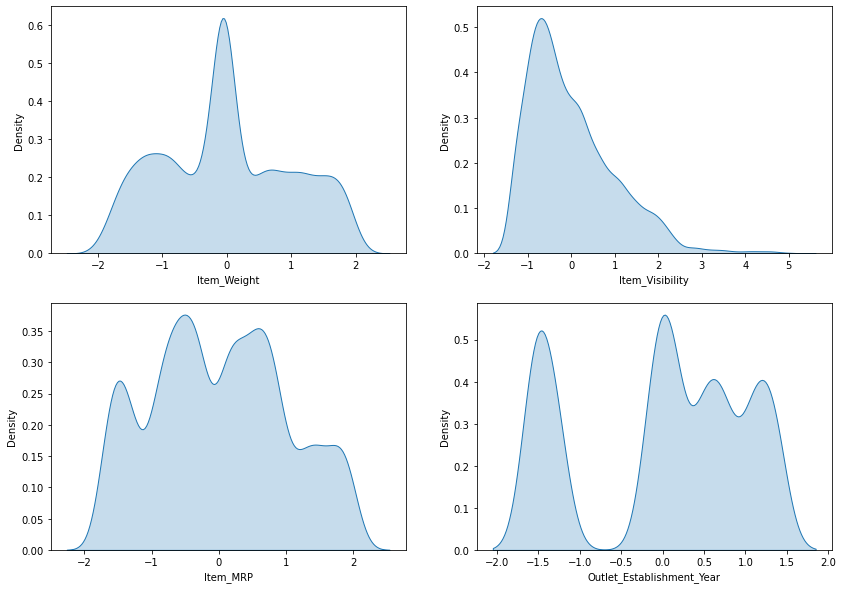

In [176]:
f, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.kdeplot(data=X_train_scaled, x="Item_Weight", ax=axs[0][0], shade=True)
sns.kdeplot(data=X_train_scaled, x="Item_Visibility", ax=axs[0][1], shade=True)
sns.kdeplot(data=X_train_scaled, x="Item_MRP", ax=axs[1][0], shade=True)
sns.kdeplot(data=X_train_scaled, x="Outlet_Establishment_Year", ax=axs[1][1], shade=True)


# 9. Modeling

## Linear Regression 

In [102]:
linear_reg_model = LinearRegression()

linear_reg_model.fit(X_train_scaled, y_train)

lin_reg_preds = linear_reg_model.predict(X_valid_scaled)

lin_reg_mae = mean_absolute_error(y_valid, lin_reg_preds)
print("MAE of linear regression model: ", lin_reg_mae)

MAE of linear regression model:  851.5626165861324


C:\Users\LapStore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\LapStore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [177]:
lin_reg_test_preds = linear_reg_model.predict(X_test_scaled)

C:\Users\LapStore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [178]:
linear_reg_output = pd.DataFrame({
    'Id': X_test_scaled.index,
    'SalePrice': lin_reg_test_preds
})
linear_reg_output.to_csv("linear_reg_output.csv", index=False)

In [179]:
linear_reg_output.head()

,Id,SalePrice
0,0,1887.182488
1,1,1571.182488
2,2,1932.682488
3,3,2583.182488
4,4,5174.432488


## Decision Trees 

In [103]:
def get_mea(max_leaf_node, X_train, X_val, y_train, y_val):
    model = DecisionTreeRegressor(random_state=0, max_leaf_nodes=max_leaf_node)
    model.fit(X_train, y_train)
    prediction_valid = model.predict(X_val)
    mae = mean_absolute_error(y_val, prediction_valid)
    return mae

In [104]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
maes_cal = []

for max_leaf_node in candidate_max_leaf_nodes:
    mae_cal = get_mea(max_leaf_node, X_train_scaled, X_valid_scaled, y_train, y_valid)
    print("Max leaf nodes: %f  \t\t Mean Absolute Error:  %f" %(max_leaf_node, mae_cal))
    maes_cal.append(mae_cal)

# Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
best_tree_size = candidate_max_leaf_nodes[np.argmin(maes_cal)]
print("best_tree_size = ", best_tree_size)

C:\Users\LapStore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\LapStore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\LapStore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\LapStore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\LapStor

Max leaf nodes: 5.000000  		 Mean Absolute Error:  933.590286
Max leaf nodes: 25.000000  		 Mean Absolute Error:  788.170661
Max leaf nodes: 50.000000  		 Mean Absolute Error:  800.168872
Max leaf nodes: 100.000000  		 Mean Absolute Error:  819.391210
Max leaf nodes: 250.000000  		 Mean Absolute Error:  864.446479
Max leaf nodes: 500.000000  		 Mean Absolute Error:  917.081224
best_tree_size =  25


C:\Users\LapStore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\LapStore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\LapStore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\LapStore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\LapStor

### Our model: 

In [182]:
X_train_full = pd.concat([X_train_scaled, X_valid_scaled], axis=0)
y_full = pd.concat([y_train, y_valid], axis=0)

dt_model = DecisionTreeRegressor(random_state=0, max_leaf_nodes=25)
dt_model.fit(X_train_full, y_full)

dt_test_preds = dt_model.predict(X_test_scaled)
dt_output = pd.DataFrame({
    'Id': X_test_scaled.index,
    'SalePrice': dt_test_preds
})
dt_output.to_csv("dt_test_preds.csv", index=False)

C:\Users\LapStore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\LapStore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [183]:
dt_output.head()

,Id,SalePrice
0,0,1624.469120
1,1,1349.512904
2,2,471.306847
3,3,2526.199638
4,4,6466.310127


## Random Forest

In [191]:
def get_mea(n_estimators, X_train, X_val, y_train, y_val):
    model = RandomForestRegressor(random_state=0, n_estimators=n_estimators)
    model.fit(X_train, y_train)
    prediction_valid = model.predict(X_val)
    mae = mean_absolute_error(y_val, prediction_valid)
    return mae

In [193]:
maes = []
candidate_n_estimators = list(range(50, 550, 50))
for i in range(50, 550, 50):
    avg_mae = get_mea(n_estimators=i, X_train=X_train_scaled, X_val=X_valid_scaled, y_train=y_train, y_val=y_valid)
    print("n_estimators: %f  \t\t Mean Absolute Error:  %f" %(i, avg_mae))
    maes.append(avg_mae)
    
best_n_estimators = candidate_n_estimators[np.argmin(maes)]
print("best_n_estimators_num = ", best_n_estimators)

C:\Users\LapStore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\LapStore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\LapStore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


n_estimators: 50.000000  		 Mean Absolute Error:  812.776275


C:\Users\LapStore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\LapStore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


n_estimators: 100.000000  		 Mean Absolute Error:  810.866644


C:\Users\LapStore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\LapStore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


n_estimators: 150.000000  		 Mean Absolute Error:  809.307097


C:\Users\LapStore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\LapStore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


n_estimators: 200.000000  		 Mean Absolute Error:  808.592285


C:\Users\LapStore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


n_estimators: 250.000000  		 Mean Absolute Error:  809.870656


C:\Users\LapStore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\LapStore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


n_estimators: 300.000000  		 Mean Absolute Error:  809.348093


C:\Users\LapStore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\LapStore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


n_estimators: 350.000000  		 Mean Absolute Error:  808.820023


C:\Users\LapStore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\LapStore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


n_estimators: 400.000000  		 Mean Absolute Error:  808.775711


C:\Users\LapStore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\LapStore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


n_estimators: 450.000000  		 Mean Absolute Error:  808.248203


C:\Users\LapStore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\LapStore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


n_estimators: 500.000000  		 Mean Absolute Error:  808.156419
best_n_estimators_num =  500


### Our model:

In [194]:
rf_model = RandomForestRegressor(random_state=0, n_estimators=200)
rf_model.fit(X_train_full, y_full)

rf_test_preds = rf_model.predict(X_test_scaled)
rf_output = pd.DataFrame({
    'Id': X_test_scaled.index,
    'SalePrice': rf_test_preds
})
rf_output.to_csv("rf_test_preds.csv", index=False)

C:\Users\LapStore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\LapStore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [195]:
rf_output.head()

,Id,SalePrice
0,0,1739.762032
1,1,1232.761990
2,2,718.448135
3,3,2212.586560
4,4,6133.915530


## XGBoost 

In [215]:
def get_mea(n_estimators, X_train, X_val, y_train, y_val):
    model = XGBRegressor(random_state=0, n_estimators=n_estimators)
    model.fit(X_train, y_train)
    prediction_valid = model.predict(X_val)
    mae = mean_absolute_error(y_val, prediction_valid)
    return mae

In [216]:
maes = []
candidate_n_estimators = list(range(50, 1000, 50))
for i in range(50, 1000, 50):
    avg_mae = get_mea(n_estimators=i, X_train=X_train_scaled, X_val=X_valid_scaled, y_train=y_train, y_val=y_valid)
    print("n_estimators: %f  \t\t Mean Absolute Error:  %f" %(i, avg_mae))
    maes.append(avg_mae)
    
best_n_estimators = candidate_n_estimators[np.argmin(maes)]
print("best_n_estimators_num = ", best_n_estimators)

C:\Users\LapStore\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


n_estimators: 50.000000  		 Mean Absolute Error:  817.233834


C:\Users\LapStore\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


n_estimators: 100.000000  		 Mean Absolute Error:  849.287209


C:\Users\LapStore\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


n_estimators: 150.000000  		 Mean Absolute Error:  865.921156


C:\Users\LapStore\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


KeyboardInterrupt: 

### Our model:

In [221]:
xgb_model = XGBRegressor(random_state=0, n_estimators=50, learning_rate=0.05)
xgb_model.fit(X_train_full, y_full)

xgb_test_preds = xgb_model.predict(X_test_scaled)
xgb_output = pd.DataFrame({
    'Id': X_test_scaled.index,
    'SalePrice': xgb_test_preds
})
xgb_output.to_csv("xgb_test_preds.csv", index=False)

C:\Users\LapStore\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [222]:
xgb_output.head()

,Id,SalePrice
0,0,1529.328491
1,1,1232.680054
2,2,567.603882
3,3,2260.012207
4,4,5670.447266
